In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import random
from mlxtend.data import mnist_data

In [2]:
#Расчёт слоёв нейронной сети

def neurons_values(input_, weights, biases, function):
    '''
    Расчёт значений нейронов на всех слоях
    необходимо ввести нейроны первого слоя, веса, байесы и преобразующую функцию сети
    '''
    neurons = [input_]
    for i in range(len(weights)):
        neurons.append(list(function(np.dot(neurons[len(neurons)-1], weights[i]) + biases[i])))
    return neurons

In [3]:
#расчёт градиента для обатного распространения

def gradient_values(neurons, output, weights, biases, diff_function):
    n =len(neurons)-2
    dB=list(np.empty(n+1))
    dB[n]=2*(np.array(neurons[n+1])-np.array(output))* \
    diff_function(np.dot(neurons[n],weights[n])+np.array(biases[n]))
    for k in range(1,n+1):
        dB[n-k] = np.dot(dB[n-k+1],np.array(weights[n-k+1]).T)* \
        diff_function(np.dot(neurons[n-k],weights[n-k])+biases[n-k])
    dW = []
    for k in range(n+1):
        dW.append(np.dot(np.array(neurons[k]).reshape(-1,1), np.array(dB[k]).reshape(1,-1)))
    return dB, dW

In [4]:
def net_generator(*args):
    W = []
    for i, el in enumerate(args[:-1]):
        W.append(np.ones((el, args[i+1])))
    B = [np.ones(x) for x in args[1:]]
    return np.array(W), np.array(B)

In [5]:
Inputs,Outputs=mnist_data()

def values_generator(Inputs,Outputs):
    a=random.randint(0,4999) 
    return(Inputs[a],Outputs[a])

In [6]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def derivative_sigmoid(x):
    ds = np.exp(-x) / (1+np.exp(-x))**2
    return ds

In [13]:
W, B = net_generator(784, 2, 1)
for cycle_num in range(1000000):
    speed = 0.5
    I, O = values_generator(Inputs,Outputs)
    neurons = neurons_values(I, W, B, sigmoid)
    last_layer = int(neurons[-1][0]*10)
    if cycle_num % 1000 == 0:
        print(f'cycle {cycle_num}, last_layer {last_layer}, O {O} ,difference {np.abs(last_layer - O)}')
    dB, dW = gradient_values(neurons, O, W, B, derivative_sigmoid)
    for i in range(len(B)):
        B[i] -= dB[i] * speed
        W[i] -= dW[i] * speed

NameError: name 'net_generator' is not defined

In [7]:
def values_generator2():
    a,b,c = np.random.standard_normal(3) 
    d = np.cos(a+b+c)  
    return [[a,b,c],d]

In [16]:
def values_generator3():
    a,b,c = np.random.randint(1, 100, size=3)
    d = 1/(a+b+c)  
    return [[a,b,c],d]

<ipython-input-4-ee313b4f450a>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(W), np.array(B)


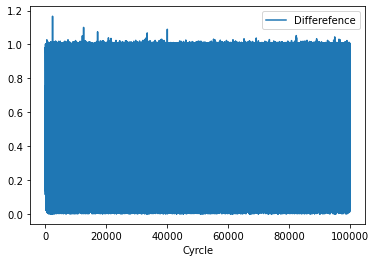

In [17]:
W, B = net_generator(3, 10, 5, 1)
batch_size = 1000
cyrcles = []
differencies = []
speed = 0.5
for cycle_num in range(100000):
    I, O = values_generator3()
    neurons = neurons_values(I, W, B, np.sin)
    last_layer = neurons[-1][0]
    #if cycle_num % 100000 == 0:
        #print(f'cycle {cycle_num}, last_layer {last_layer}, O {O} ,difference {np.abs(last_layer - O)}')
    dB, dW = gradient_values(neurons, O, W, B, np.cos)
    if cycle_num == 0:
        dB_batch = dB.copy()
        dW_batch = dW.copy()
    if cycle_num % batch_size == 0 and cycle_num != 0:
        for i in range(len(B)):
            dB_batch[i] /= batch_size
            dW_batch[i] /= batch_size
            B[i] -= dB_batch[i] * speed
            W[i] -= dW_batch[i] * speed
            dB_batch[i] = 0
            dW_batch[i] = 0
    else:
        for i in range(len(B)):
            dB_batch[i] += dB[i]
            dW_batch[i] += dW[i]
    cyrcles.append(cycle_num)
    differencies.append(np.abs(last_layer - O))

df = pd.DataFrame({'Cyrcle': cyrcles, 'Differefence': differencies})
df = df.set_index('Cyrcle')
df.plot.line()    

<ipython-input-4-ee313b4f450a>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(W), np.array(B)


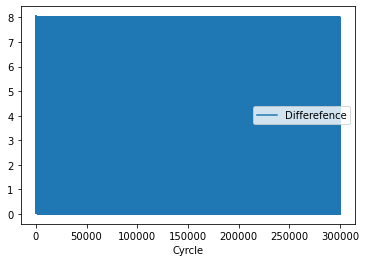

In [15]:
W, B = net_generator(784, 2, 1)
batch_size = 500
cyrcles = []
differencies = []
speed = 0.5
for cycle_num in range(300000):
    I, O = values_generator(Inputs,Outputs)
    neurons = neurons_values(I, W, B, sigmoid)
    last_layer = neurons[-1][0]
    #if cycle_num % 100000 == 0:
        #print(f'cycle {cycle_num}, last_layer {last_layer}, O {O} ,difference {np.abs(last_layer - O)}')
    dB, dW = gradient_values(neurons, O, W, B, derivative_sigmoid)
    if cycle_num == 0:
        dB_batch = dB.copy()
        dW_batch = dW.copy()
    if cycle_num % batch_size == 0 and cycle_num != 0:
        for i in range(len(B)):
            dB_batch[i] /= batch_size
            dW_batch[i] /= batch_size
            B[i] -= dB_batch[i] * speed
            W[i] -= dW_batch[i] * speed
            dB_batch[i] = 0
            dW_batch[i] = 0
    else:
        for i in range(len(B)):
            dB_batch[i] += dB[i]
            dW_batch[i] += dW[i]
    cyrcles.append(cycle_num)
    differencies.append(np.abs(last_layer - O))

df = pd.DataFrame({'Cyrcle': cyrcles, 'Differefence': differencies})
df = df.set_index('Cyrcle')
df.plot.line()    